박해선님은 `Python 3.7`을 이용하셨지만, 저는 `Python 3.9`를 이용하였습니다.
# 2장 예제 1-1

In [1]:
# assert : 조건문을 이용하여 조건에 맞는 버전을 import해줌
import sys
assert sys.version_info >= (3,5)
import sklearn
assert sklearn.__version__ >= '0.20'

import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelad')

# 그래프 설정
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# 모든 Plot에 Font크기 설정
mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "../"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# 데이터 가져오기

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("..","datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [3]:
import pyarrow.csv as csv
# 다운받은 집값 데이터 가져오기
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return csv.read_csv(csv_path).to_pandas()
housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
# housing의 상세 정보 보기
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


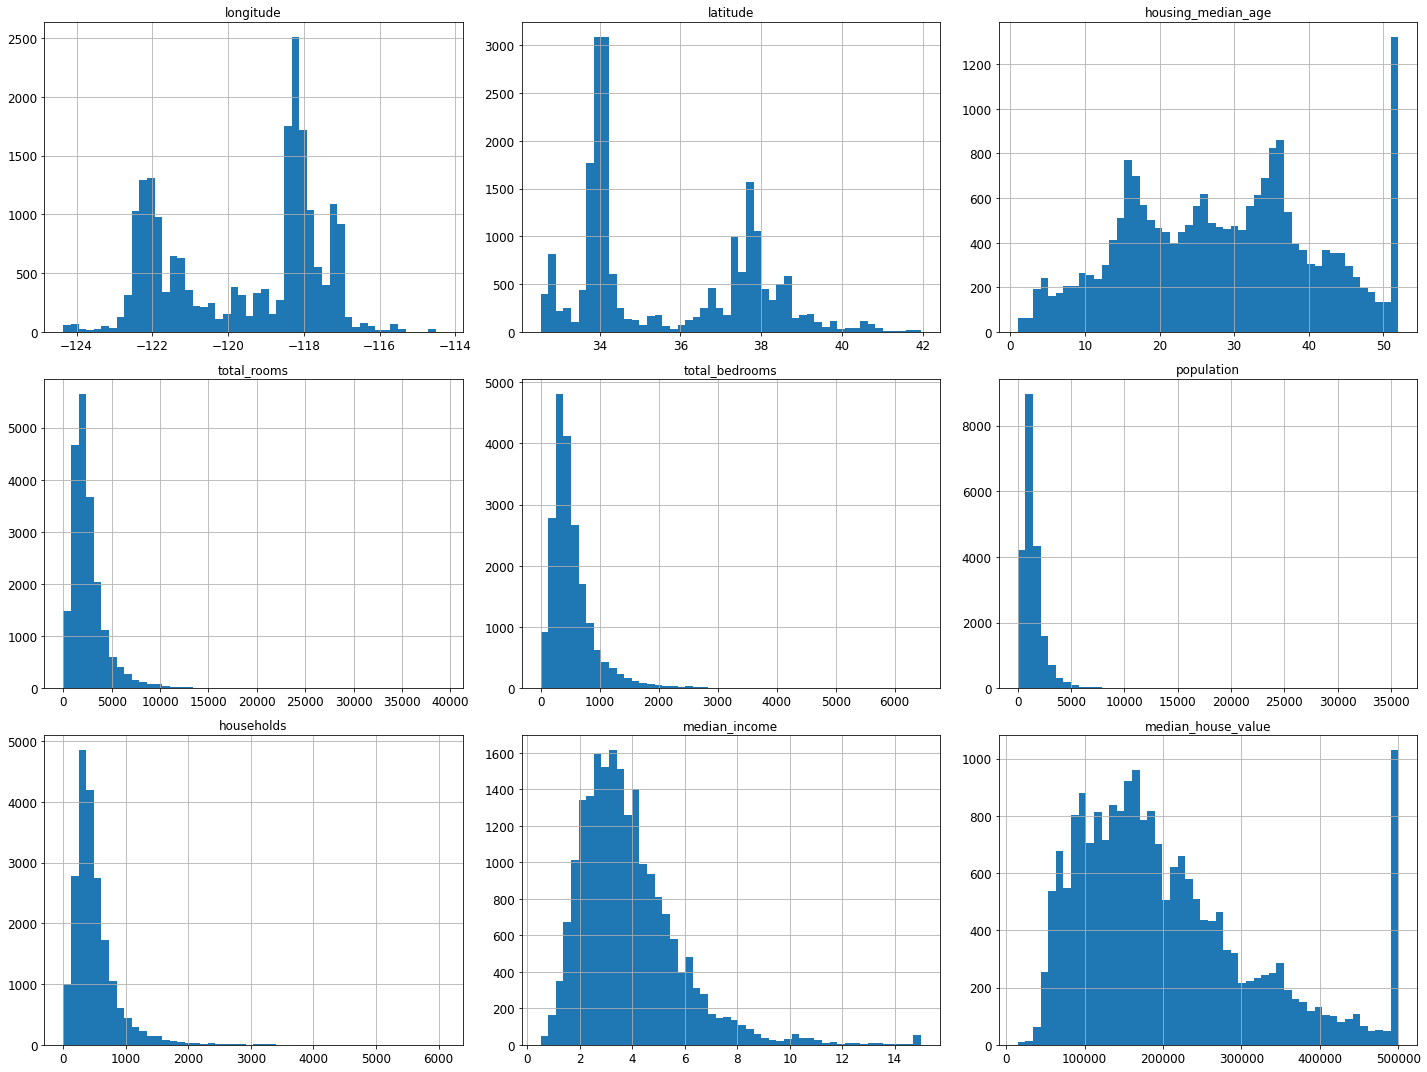

In [5]:
# 간단히 시각화를 하여 데이터 구조를 한눈에 볼 수 있다.
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Test Set 생성

# Train_Test Split 사용자 정의 함수
- 아래와 같이 Train_Test Split을 정의할 수 있다.
- 하지만 일반적인 경우에는 `sklearn.model_selection`안에 있는 `train_test_split`을 사용한다.

In [6]:
# test-Set을 변경하지 않기위해 아래 함수 정의

# Hash사용, digest가 python2에서는 정수가 아닌 문자열을 반환하여 권장하지 않는다.
import hashlib
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
# 만약 굳이 Hash를 사용하고 싶다면 아래와 같이 선언한다면 Python2,3 모두 사용 가능하다
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio
    
# checkSum을 이용하여 분류
from zlib import crc32
def test_set_check(indentifier, test_ratio):
    # checkSum을 생성하여 Test_Ratio보다
    # 낮은 값은 Test-Set으로 사용하고,
    # 높으면 다음 Train-Set으로 사용하겠다는 의미
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32

# test_set_check으로 Train Test나눠주는 함수
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
# `index` 열이 추가된 데이터프레임을 반환합니다
# 인덱스를 사용할 때 중복여부를 판단하고 사용해야한다.
housing_with_id = housing.reset_index()   
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [7]:
from sklearn.model_selection import train_test_split
# 강의영상과 동일한 결과값을 확인하기 위해 Radon_State에 42를 넣어줌
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_set),len(test_set))

16512 4128


<AxesSubplot:>

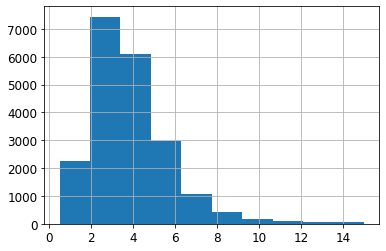

In [8]:
housing.median_income.hist()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64


<AxesSubplot:>

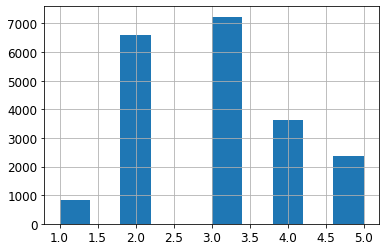

In [9]:
# 범주형으로 변경해주기
housing['income_cat'] = pd.cut(
    housing.median_income,
    # 아래 5개의 구역으로 구분하여 나눠줌
    bins = [0.,1.5,3.0,4.5,6.,np.inf],
    labels= [i for i in range(1,6)]
)
print(housing.income_cat.value_counts())
housing.income_cat.hist()

In [10]:
# Stratified : 계층형으로 
# StratifiedShuffleSplit : StratifiedKFold + ShuffleSplit
# 범주형으로 고르게 분할해줌
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_idx ,test_idx in split.split(housing,housing.income_cat):
    start_train_set = housing.loc[train_idx]
    start_test_set = housing.loc[test_idx]
print(
    start_train_set.income_cat.value_counts()/ len(start_train_set),
    housing.income_cat.value_counts()/ len(housing)
)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64 3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [11]:
# 위 과정이 복잡하지 않다면 train_test_split만으로도 구현할 수 있다.
train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify= housing.income_cat
    )
print(len(train_set),len(test_set))

16512 4128


In [12]:
# 계층적(stratify)으로 나눴을때의 차이를 보여주는 셀
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(start_train_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039789,0.040213,0.973236,-0.091241
2,0.318847,0.318859,0.324370,1.732260,0.003799
3,0.350581,0.350594,0.358527,2.266446,0.003455
4,0.176308,0.176296,0.167393,-5.056334,-0.006870
5,0.114438,0.114462,0.109496,-4.318374,0.021169


In [13]:
# 위 과정은 강의에서 이런 것이 있다고 보여주려는 코드들 이기 때문에
# income_cat을 제거해준다.
for set_ in (start_train_set, start_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 데이터 탐색 및 시각화

In [14]:
# 켈리포니아 이미지 가져오기
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('../images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x25b20088d90>)

단순 시각화
그림 저장: bad_visualization_plot


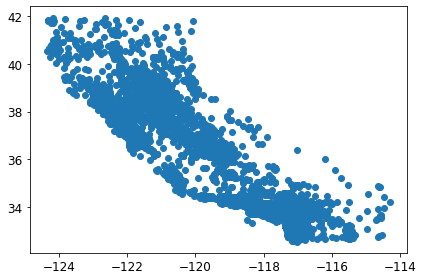

간단하게 설정한 시각화
그림 저장: better_visualization_plot


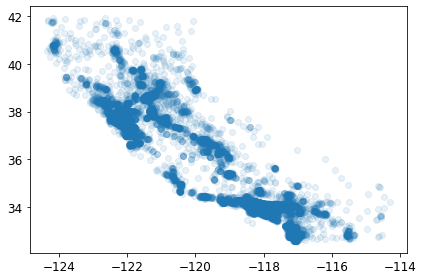

색 혹은 크기등 섬세하게 설정한 시각화
그림 저장: housing_prices_scatterplot


<Figure size 432x288 with 0 Axes>

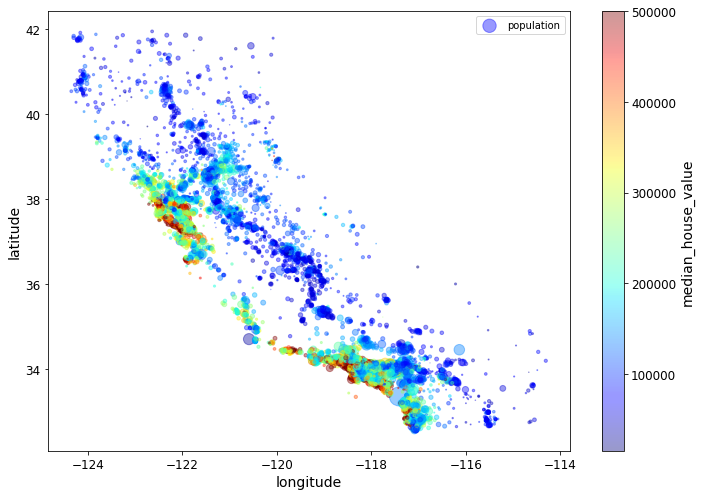

지도이미지와 겹쳐서 산점도 보여주기
그림 저장: california_housing_prices_plot


<Figure size 432x288 with 0 Axes>

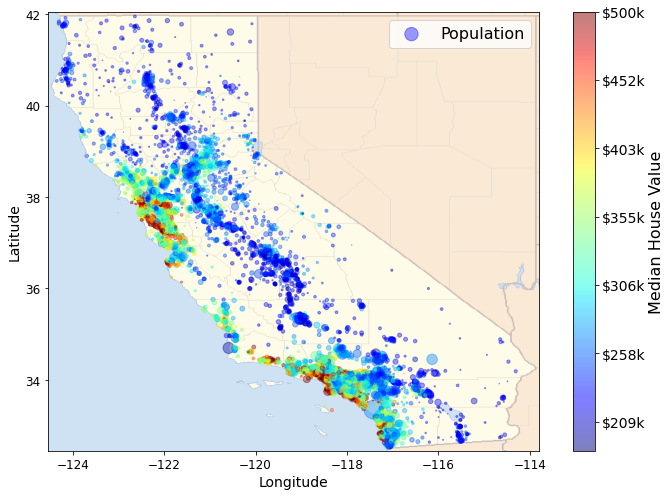

In [15]:
# rawDataFrame은 남겨두는 것이 좋다.
housing = start_train_set.copy()

print('단순 시각화')
# housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude')
plt.scatter(housing.longitude, housing.latitude)
save_fig('bad_visualization_plot')
plt.show()

print('간단하게 설정한 시각화')
plt.clf()
# alpha : 투명도 설정
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.scatter(housing.longitude, housing.latitude,alpha=.1)
save_fig("better_visualization_plot")
plt.show()

plt.clf()
print('색 혹은 크기등 섬세하게 설정한 시각화')
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")
plt.show()
plt.clf()


# 켈리포니아 이미지와 데이터를 겹쳐서 시각화하기
print('지도이미지와 겹쳐서 산점도 보여주기')
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population", # 원 크기
                  c="median_house_value", # 색
                  cmap=plt.get_cmap("jet"), # jet = 높으면 빨강, 낮으면 파랑
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()



In [16]:
# 상관계수 보기
corr_mat = housing.corr()
corr_mat.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

그림 저장: scatter_matrix_plot


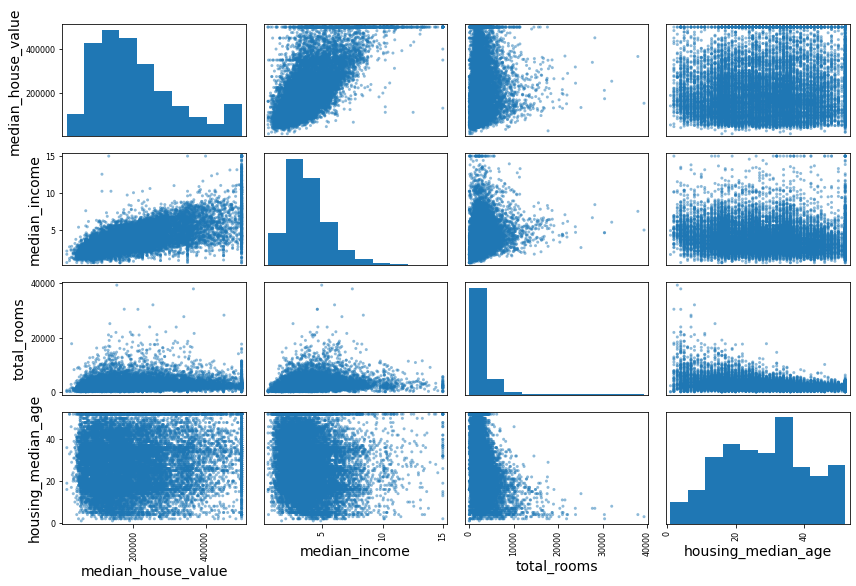

In [17]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

그림 저장: income_vs_house_value_scatterplot


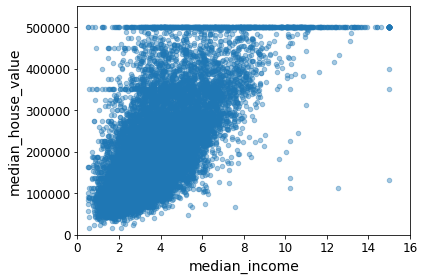

In [18]:
# 위에서 
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.4)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

# 특성 조합으로도 확인해보기

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


<Figure size 432x288 with 0 Axes>

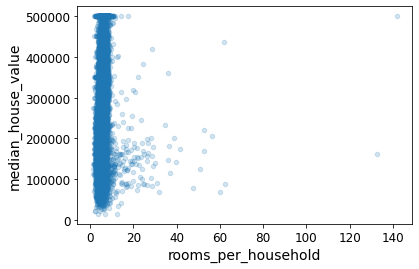

In [19]:
housing["rooms_per_household"] = housing.total_rooms/housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["population_per_household"]=housing.population/housing.households

corr_mat = housing.corr()
print(corr_mat.median_house_value.sort_values(ascending=False))
# Plot을 이용하면 더 쉽게 확인할 수 있다.
plt.clf()
housing.plot(
    kind="scatter",
    x="rooms_per_household",
    y="median_house_value",
    alpha=0.2
    )
plt.show()

In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 머신러닝 알고리즘을 위한 데이터 준비

In [21]:
housing = start_train_set.drop("median_house_value",axis=1)
housing_labels = start_train_set["median_house_value"].copy()

# 간단한 데이터 정제 옵션

## 간단한 방법들
1. housing.dropna(subset = ['total_bedrooms'])
    - total_bedrooms값이 결측치면 없애기
    - Row 증 행을 삭제함 
    
1. housing.drop('total_bedrooms',axis = 1)
    - total_bedrooms값삭제하기
    - total_bedrooms에 결측값이 있음으로 칼럼 자체를 삭제
 
1. ```python
    median = housing['total_bedrooms'].median()
    housing['total_bedrooms'].fillna(median,inplace = True)
    ```
    - total_bedrooms의 결측값에 `중앙값` 삽입

In [22]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
# 1번 방법
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    
# 2번 방법
sample_incomplete_rows.drop("total_bedrooms", axis=1)
# 3번 방법
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [24]:
housing_num = housing.drop('ocean_proximity',axis = 1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

# Train-Set 변환

In [25]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(
    X,
    columns = housing_num.columns,
    index = housing_num.index
)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


# 텍스트 및 범주형 특성 다루기

> 범주형인 `ocean_proximity`를 이용하여 전처리

In [26]:
# [[]]로 묶은 이유는 괄호가 하나만 있다면 Serise로 나오기 때문!
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [27]:
# OrdinalEncoder를 이용하면 범주형 데이터를 숫자로 맵핑시켜줌
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# housing_cat_encoded
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [28]:
# OneHotEncoder을 이용하여 희소 행렬로 변환시켜준다.
# 각 범주값이 위치에 따라 1개만 1, 나머지는 0으로 만들어준다.
from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse=False)
# 위와 같이 sparse = Fasle를 하면 바로 밀집 배열를 반환해준다.
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 사용자 정의 변환기


In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스 하드코딩
# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# 하드코딩 할 수 있지만, 아래와 같이 자동으로 구해줄 수 있다.
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # 파라미터 정의
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    # 훈련시 사용
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    # 
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        # 구한을 합침으로써 사용
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]            
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [30]:
# housing_extra_attribs 은 ndarray이기 때문에 열이름이 없음으로 아래와같이 삽입해줘야 DataFrame으로 복원할 수 있다.
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


# 변환 파이프라인
수치형 특성을 전처리를 위해 파이프라인 생성

In [31]:
# Pipeline을 이용하여 여러처리(변환, 추정,등) 를 단일 개체로 생성할 수 있다.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    # 이름 + 클래스 ( 이름을 넣는 이유는 참조하기 편하게 하기 위해서 삽입)
    ('inputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])
housing_num_tr = num_pipline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [32]:

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
# ColumnTransformer 를 이용하여 위에 생성한 것을 합쳐준다
full_pipeline = ColumnTransformer([
    # 이름 , 클래스 , 적용대상
    ('num', num_pipline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
# 위 과정의 옛날에 하던 방식

from sklearn.base import BaseEstimator, TransformerMixin

# 전처리를 위한 클래스
# 수치형 열과 범주형 열을 선택하기 위한 클래스
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# 합치고자 하는 파이프라인 생성
old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])
# FeatureUnion 을 이용하여 병합
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# 모델 선택 및 훈련
## Train-set 훈련 및 평가

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
# 위에 생성한 파이프라인을 이용하여 새로운 데이터를 사용하더라도 새로 생성하지 않고 바로 사용할 수 있다.
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [35]:
# predict한 값 및 target값의 rmse를 구해보기
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)  

print('mse ',mean_squared_error(housing_labels,housing_predictions))
print('rmse_ver01',lin_rmse)
# 아래와 같이 squared에 False를 삽입하면 rmse를 구해준다
print('rmse_ver02',mean_squared_error(housing_labels,housing_predictions , squared=False))
# predict한 값 및 target값의 mae를 구해보기

from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_labels,housing_predictions)
print('mae',lin_mae)
# 1 - ( Target, Predict) ^ 2  / (Target - mean(Target)) ^ 2
# 1에 가까우면 좋은 모델
print('R_score ',lin_reg.score(housing_prepared, housing_labels))

mse  4709785076.060029
rmse_ver01 68627.87390018745
rmse_ver02 68627.87390018745
mae 49438.66860915801
R_score  0.6481553634454353


R_score가 0.64이 나온 것은 좋은 결과가 아니다.
`훈련데이터`를 넣고 훈련을 했지만, 이렇게 `낮게` 나왔다면 `충분히 훈련되지 않았다`는 것으로 추측할 수 있다. 그럼으로 과소적합( `UnderFitting` )이라고 판단할 수 있다.

In [55]:
from sklearn.tree import DecisionTreeRegressor
# DecisionTreeRegressor 로 생성
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(housing_prepared, housing_labels)
housing__predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing__predictions)
tree_rmse = mean_squared_error(housing_labels,housing__predictions,squared=False)
print(tree_mse,tree_rmse)


from sklearn.ensemble import RandomForestRegressor
# RandomForestRegressor
forest_reg = RandomForestRegressor(
    n_estimators = 100,
    random_state = 42
)
forest_reg.fit(
    X = housing_prepared,
    y = housing_labels
)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse =  mean_squared_error(housing_labels , housing_predictions)
forest_rmse =  mean_squared_error(housing_labels , housing_predictions , squared=False)


# SVR : Support Vector Regression
from sklearn.svm import SVR 

svm_reg = SVR(kernel = 'linear')
svm_reg.fit(
    X = housing_prepared,
    y = housing_labels
)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels,housing_predictions)
svm_rmse = mean_squared_error(housing_labels,housing_predictions,squared = False)


0.0 0.0


- 위 셀의 결과 같이 `rmse,mse`가 `0`이 나온다면, `Overfitting(과대적합)`이라고 볼 수 있다.
- `OverFitting`이면 `검증단계`에서 점수가 낮게 나올 확율이 높다

# 교차검증 (Cross Validation)

> 데이터를 여러번 분해해서 `train`,`test`로 분할하여 여러번 검증을 한다.

- ![Cross-validation](https://miro.medium.com/proxy/1*NyvaFiG_jXcGgOaouumYJQ.jpeg)
    - [이미지 출처](https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f)

- `sklearn은 점수가 높으면 좋다`고 판단하지만 ,`mse는 낮으면 좋은 결과값`이기 떄문에 그의 음수값인 `neg_mean_squared_error` 를 사용하여 점수를 산정해준다.

In [56]:
from sklearn.model_selection import cross_val_score

# tree regression으로 점수 확인
scores  = cross_val_score(
    tree_reg, # 회기 모델
    housing_prepared, # 훈련 셋
    housing_labels, # 타겟 셋
    scoring = "neg_mean_squared_error", # 점수 산정 방식     
    cv = 10 # 검증 횟수
)
tree_rmse_scores = np.sqrt(-scores)

# linear regression으로 점수 확인
lin_scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_labels,
    scoring='neg_mean_squared_error',
    cv = 10
)
lin_rmse_scores = np.sqrt(-lin_scores)

# RandomForestRegressor를 이용한 예측모델 교차검증한 점수 확인
forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring ='neg_mean_squared_error',
    cv = 10
)
forest_rmse_socres = np.sqrt(-forest_scores)

# SVR을 이용한 예측모델 교차검증한 점수 확인
svr_scores = cross_val_score(
    svm_reg,
    housing_prepared,
    housing_labels,
    scoring ='neg_mean_squared_error',
    cv = 10
)
svr_rmse_socres = np.sqrt(-svr_scores)


# 각 점수을 출력해주는 함수
def dispay_score(score):
    print("score : ", score)
    print("score Mean : ", score.mean())
    print("score Standard Deviation: ", score.std(),end='\n\n')

print('tree_rmse_scores')
dispay_score(tree_rmse_scores)

print('lin_rmse_scores')
dispay_score(lin_rmse_scores)

print('forest_rmse_socres')
dispay_score(forest_rmse_socres)

print('svr_rmse_socres')
dispay_score(svr_rmse_socres)



tree_rmse_scores
score :  [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
score Mean :  71629.89009727491
score Standard Deviation:  2914.035468468928

lin_rmse_scores
score :  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
score Mean :  69104.07998247063
score Standard Deviation:  2880.3282098180675

forest_rmse_socres
score :  [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
score Mean :  50435.58092066179
score Standard Deviation:  2203.3381412764606

svr_rmse_socres
score :  [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
score Mean :  111814.1069260169
sco

# 모델 세부 튜닝
## GreedSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # n_estimators : 결정 트리의 갯수
    # max_features : 특성의 갯수
    # 아래는 3 * 4의 개수로 cross Validation (조합) 을 수행한다.
    {
        'n_estimators' : [3, 10,30],
        'max_features' : [i for i in range(2,10,2)]
    },
    # n_estimators(2개) * max_features(3개)로 6개의 조합으로 수행함
    {
        'bootstrap' : [False],
        'n_estimators' : [3,10],
        'max_features' : [i for i in range(2,5)]
    }
]

forest_reg = RandomForestRegressor(random_state=42)

# 위 param에서 12 + 6의 조합이고, cv가 5임으로
# (12 + 6) * 5 개의 훈련을 한다.

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error', # 회기모델 이기 때문에 nmse를 사용
    return_train_score =True
)

grid_search.fit(
    X = housing_prepared,
    y = housing_labels
)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
# 찾은 최상의 파라미터
print('best_param :  ' , grid_search.best_params_)
print('best_estimator :  ' , grid_search.best_estimator_,end='\n\n')


# 각각의 HyperParameter의 모든 조합의 점수 출력
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score) , params)
# 아래와 같이 만든다면, 데이터프레임으로 확인할 수 있다.
cv_result = pd.DataFrame(grid_search.cv_results_)

best_param :   {'max_features': 8, 'n_estimators': 30}
best_estimator :   RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5997

# Random Search


In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs  = {
    'n_estimators' : randint(low = 1 , high = 200),
    'max_features' : randint(low = 1 , high = 8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search =  RandomizedSearchCV(
    forest_reg, #객체
    param_distributions = param_distribs,
    n_iter = 10,# 반복횟수
    cv = 5, # Fold수 
    scoring = 'neg_mean_squared_error',
    random_state = 42
)
rnd_search.fit(
    X = housing_prepared,
    y = housing_labels
)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025B24328910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025B24328E20>},
                   random_state=42, scoring='neg_mean_squared_error')

In [78]:
# 결과 확인
cvres = rnd_search.cv_results_
for mean_score , params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score),params)
    

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


# 최상의 모델 및 오차 분석



- 트리모델의 장점
    - 특성 중요도 개선할 수 있다
    - 모델을 학습하면서  `특성(Feature)`의 중요토 판별을 할 수 있다.

In [79]:
#  Feature Importance 확인 가능.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [82]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# 아래와 같이 one_hot_encoding 해주면 각 칼러별 Feature Importance를 확인할 수 있다.
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# 각 값을 합침으로써 Feature Importance를 순서별로 나열할 수 있다.
attributes =  num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

# Test-Set으로 시스템 평가

In [84]:
# gridSearchCV를 통해 가장 좋은 모델 가져오기
final_model = grid_search.best_estimator_

# median_house_value칼럼을 제외하고 가져오기
X_test = start_test_set.drop('median_house_value',axis =1 )
# median_house_value칼럼만 가져오기
y_test = start_test_set['median_house_value'].copy()

# 위에 선언한 full_pipeline을 이용하여 기본 전처리해주기
X_test_prepared = full_pipeline.transform(X_test)

# x_test_prepared를 이용하여 모델 예측
final_predictions = final_model.predict(X_test_prepared)

# 점수 확인
final_mse = mean_squared_error(y_test,final_predictions)
finam_rmse= mean_squared_error(y_test,final_predictions,squared=False)
finam_rmse

47873.26095812988

# 테스트 RMSE의 95% 신뢰구간 계산
## 자동

In [87]:
from scipy import stats


confidence = 0.95 # 실뢰구간

# 모든 Sample에 대한 제곱오차
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_errors) - 1, # Sample 갯수
        loc = squared_errors.mean(), 
        # squered_errors.sem()
        # squared_errors.std()/np.sqrt(len(squared_errors))
        # 위 2개랑 동일한 결과를 얻는다.
        scale = stats.sem(squared_errors) 
    )
)

array([45893.36082829, 49774.46796717])

## 수동 계산
### t-score

In [90]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf(
    (1 + confidence) / 2,
    df = m-1
)
# ddof =  자유도 개수
tmargin = tscore * squared_errors.std(ddof = 1 ) / np.sqrt(m)
# 위와 같이 하여 신뢰도 구간을 확인할 수 있다.
np.sqrt( mean - tmargin) , np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

### z-score

In [89]:
zscore = stats.norm.ppf(
    ( 1 + confidence) / 2
)
zmargin = zscore * squared_errors.std(ddof = 1 ) / np.sqrt(m)
np.sqrt( mean - zmargin) , np.sqrt( mean + zmargin)

(45893.9540110131, 49773.921030650374)

# 전처리 및 예측을 포함한 전체 파이프라인

In [91]:
# 아래와 같이 사용하여 전처리 + 선형회기의 파이프라인을 생성할 수 있다.
full_pipeline_with_predictor = Pipeline(
    [
        ("preparation" , full_pipeline),
        ("linear",LinearRegression())
    ]
)
full_pipeline_with_predictor.fit(
    X = housing,
    y = housing_labels
)
full_pipeline_with_predictor.predict(
    some_data
)


array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

# joblib을 이용하여 모델 저장

> `joblib.dump`를 이용하여 `.pkl`파일로 모델을 저장할 수 있다.

In [96]:
import joblib
my_linear_model = full_pipeline_with_predictor
# 모델 피클로 저장
joblib.dump(my_linear_model,HOUSING_PATH+'/my_linear_model')
# 피클 파일로 생성된 모델 불러오기
model_loaded = joblib.load(HOUSING_PATH+'/my_linear_model')

# `RandomizedSearchCV`를 위한 Scipy 분포 함수

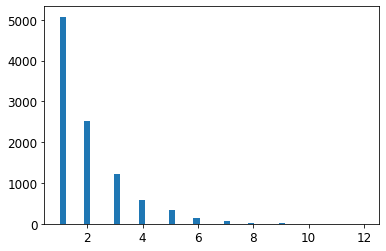

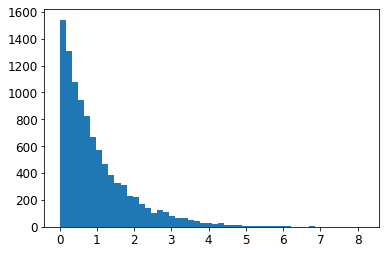

In [99]:
from scipy.stats import geom,expon
# rvs(갯수, random_state = 42)
# geom(확율) = 기하분포
# expon(scale = 람다)  = 지수분포
geom_distrib = geom(0.5).rvs(10000, random_state = 42)
expon_distrib = expon(scale = 1).rvs(10000, random_state = 42)
plt.hist(geom_distrib,bins = 50)
plt.show()
plt.hist(expon_distrib,bins = 50)
plt.show()